In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

import networkx as nx


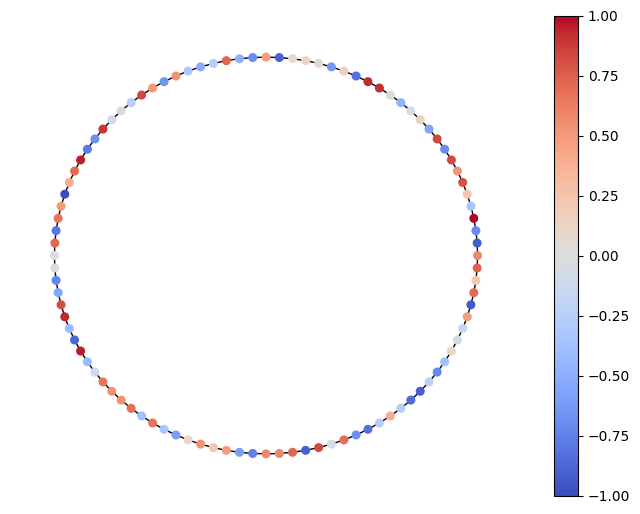

In [2]:
# parameters
N = 100 # nodes
G = nx.cycle_graph(N)

def draw_network(G, X):
    plt.figure()
    pos = nx.circular_layout(G)
    vmin = -1
    vmax = 1
    nx.draw(G, pos, node_color=X, node_size=30, cmap='coolwarm')
    sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=vmin, vmax=vmax)) #colormap
    sm.set_array([])
    plt.colorbar(sm, ax=plt.gca()) 
    A = nx.to_numpy_array(G) # adjacent neighbours matrix, to tell if there is a connection or not
    return A

X_ini = np.random.rand(N)
adj_matrix = draw_network(G, X_ini)


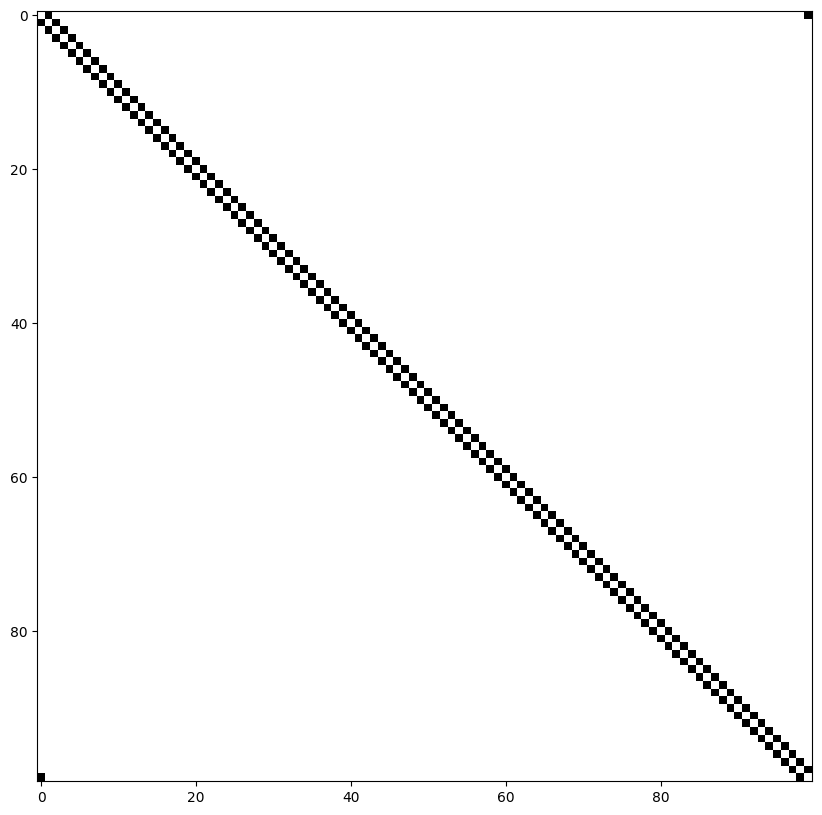

In [3]:
# to visualize the adjency matrix

plt.figure().set_size_inches(10,10)
plt.imshow(adj_matrix,cmap='binary',origin='upper',aspect='auto')


In [10]:
def quadratic_logistic_map(a, x):

    f = 1 - a * x * x
    return f

In [13]:
def chaos_logistic_map(r, x):
    g = r*x*(1-x)
    return g

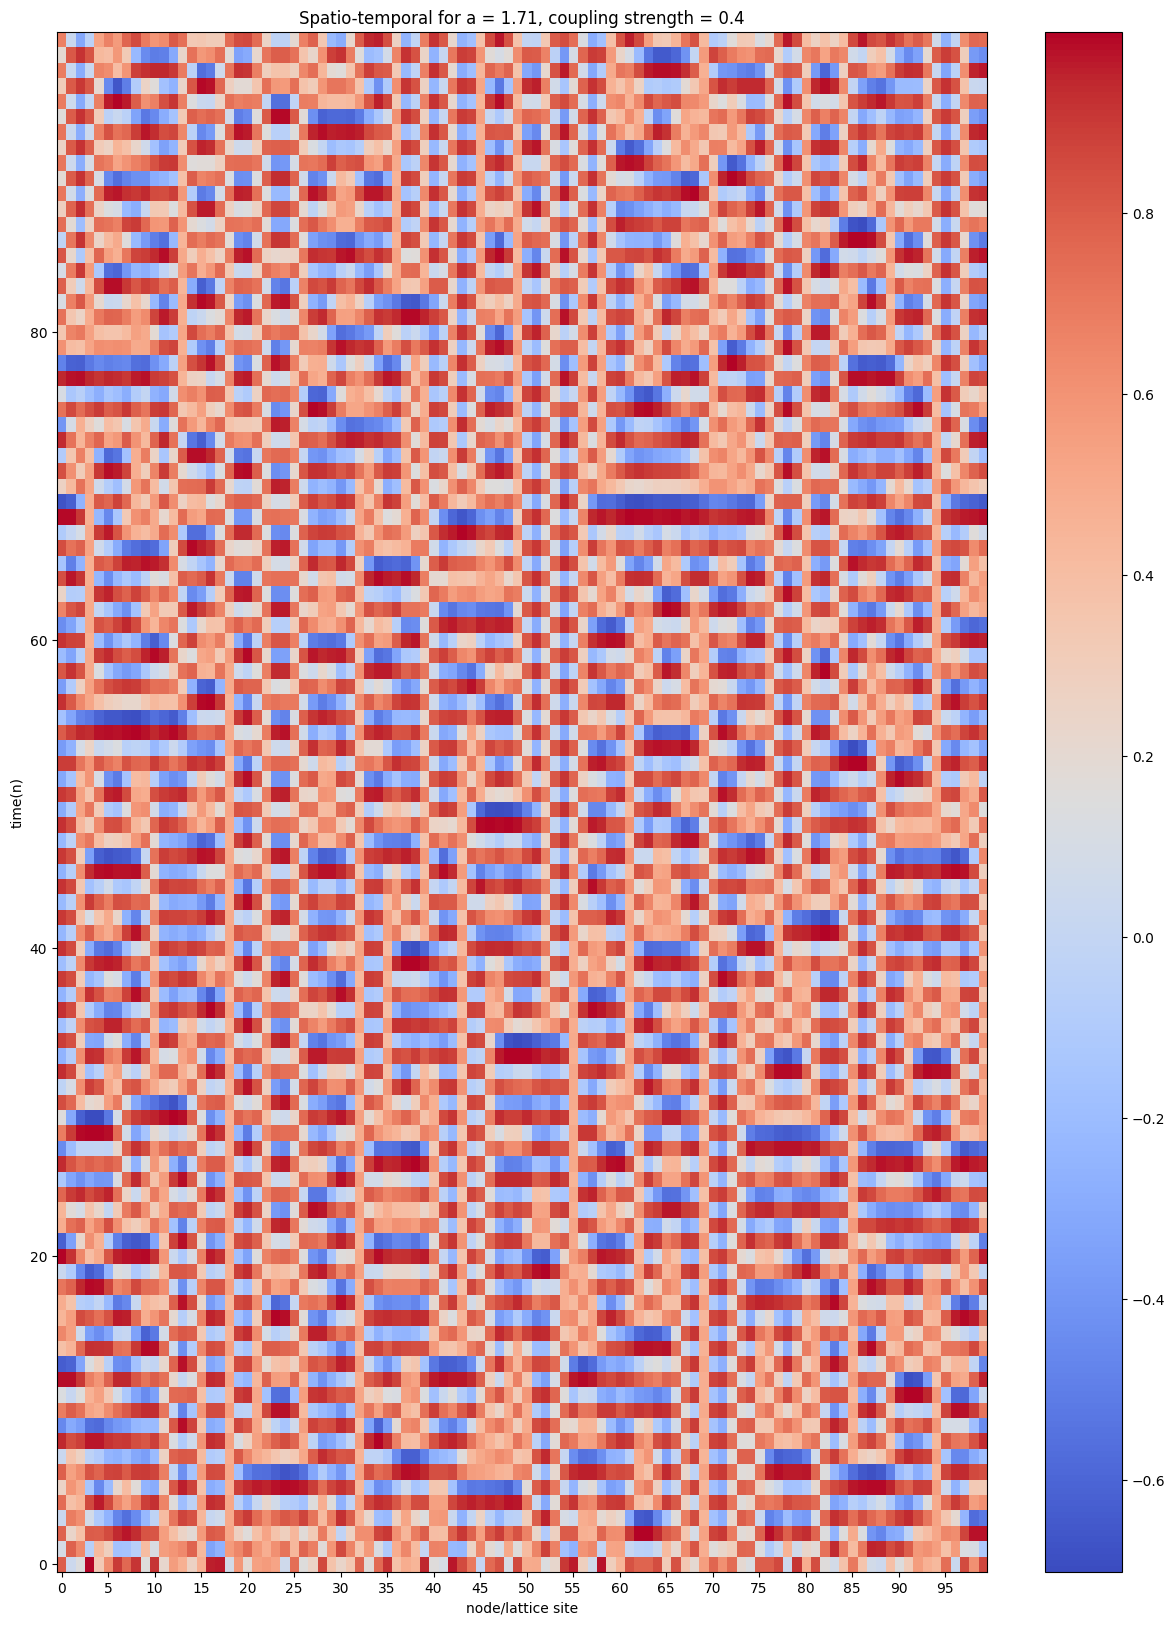

In [ ]:
# def iterate(X_ini, A, f, e, a, iterations = 1000,n = 10, M = 100):
def iterate(f,A,X_ini,e,a,iterations=1000,n=1,M=100):
    # initialize
    N = len(X_ini)
    X = np.zeros([N, iterations])
    X [:,0] = X_ini

    for k in range(1, iterations):
        Af_term = np.sum(np.multiply(A, f(a, X[:, k-1])).T, axis=0)
        X[:, k] = (1 - e) * f(a, X[:, k-1]) + 0.5 * e * Af_term

    plt.figure().set_size_inches(15, 20)
    plt.imshow(X.T[-M::n,:], origin='lower', aspect='auto', cmap='coolwarm')
    plt.colorbar()
    plt.xticks(np.arange(0, X.shape[0], 5))
    plt.xlabel('node/lattice site')
    plt.ylabel('time(n)')
    plt.title('Spatio-temporal for a = ' + str(a) + ', coupling strength = ' + str(e))

    return X

a = 1.71
e = 0.4

fin_X = iterate(quadratic_logistic_map, adj_matrix, X_ini, e, a, 100)

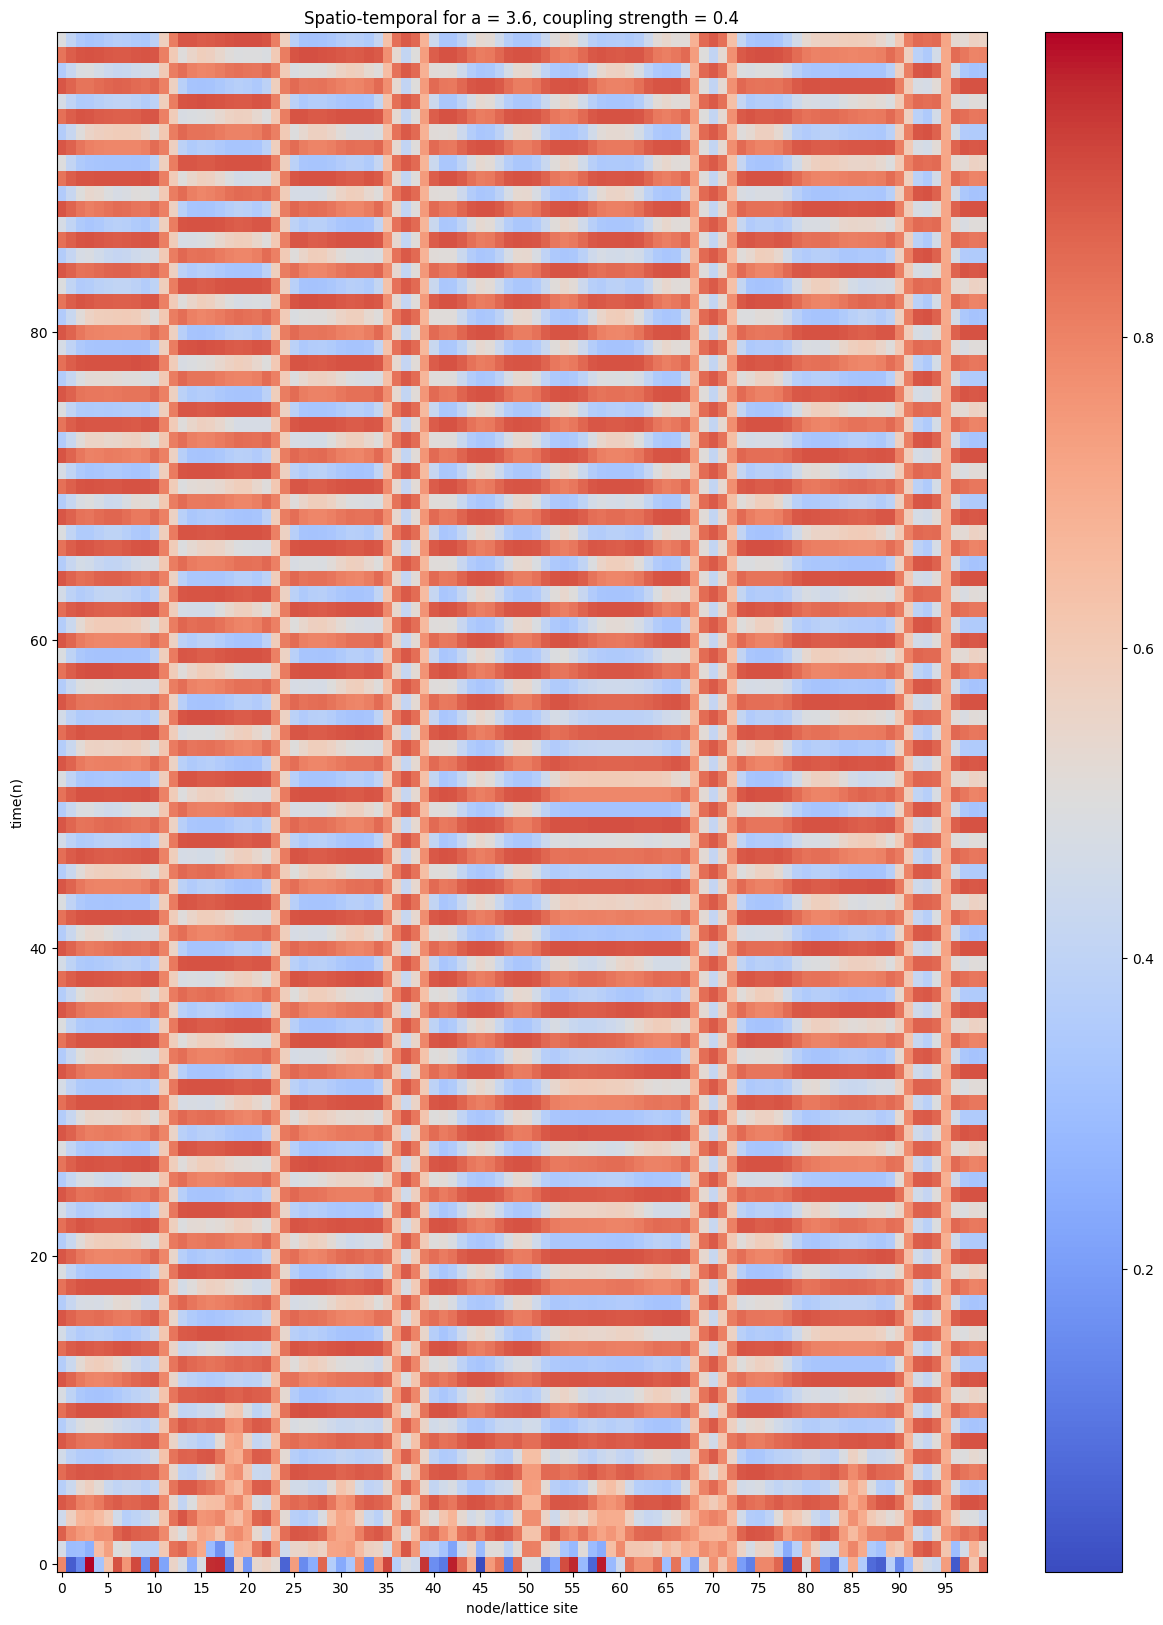

In [15]:
# def iterate(X_ini, A, f, e, a, iterations = 1000,n = 10, M = 100):
def iterate(g,A,X_ini,e,r,iterations=1000,n=1,M=100):
    # initialize
    N = len(X_ini)
    X = np.zeros([N, iterations])
    X [:,0] = X_ini

    for k in range(1, iterations):
        Ag_term = np.sum(np.multiply(A, g(r, X[:, k-1])).T, axis=0)
        X[:, k] = (1 - e) * g(r, X[:, k-1]) + 0.5 * e * Ag_term

    plt.figure().set_size_inches(15, 20)
    plt.imshow(X.T[-M::n,:], origin='lower', aspect='auto', cmap='coolwarm')
    plt.colorbar()
    plt.xticks(np.arange(0, X.shape[0], 5))
    plt.xlabel('node/lattice site')
    plt.ylabel('time(n)')
    plt.title('Spatio-temporal for a = ' + str(r) + ', coupling strength = ' + str(e))

    return X

r = 3.6
e = 0.4

fin_X = iterate(chaos_logistic_map, adj_matrix, X_ini, e, r, 100)

In [16]:
def phase_transition_map(x):
    p = np.tanh(x)
    return p

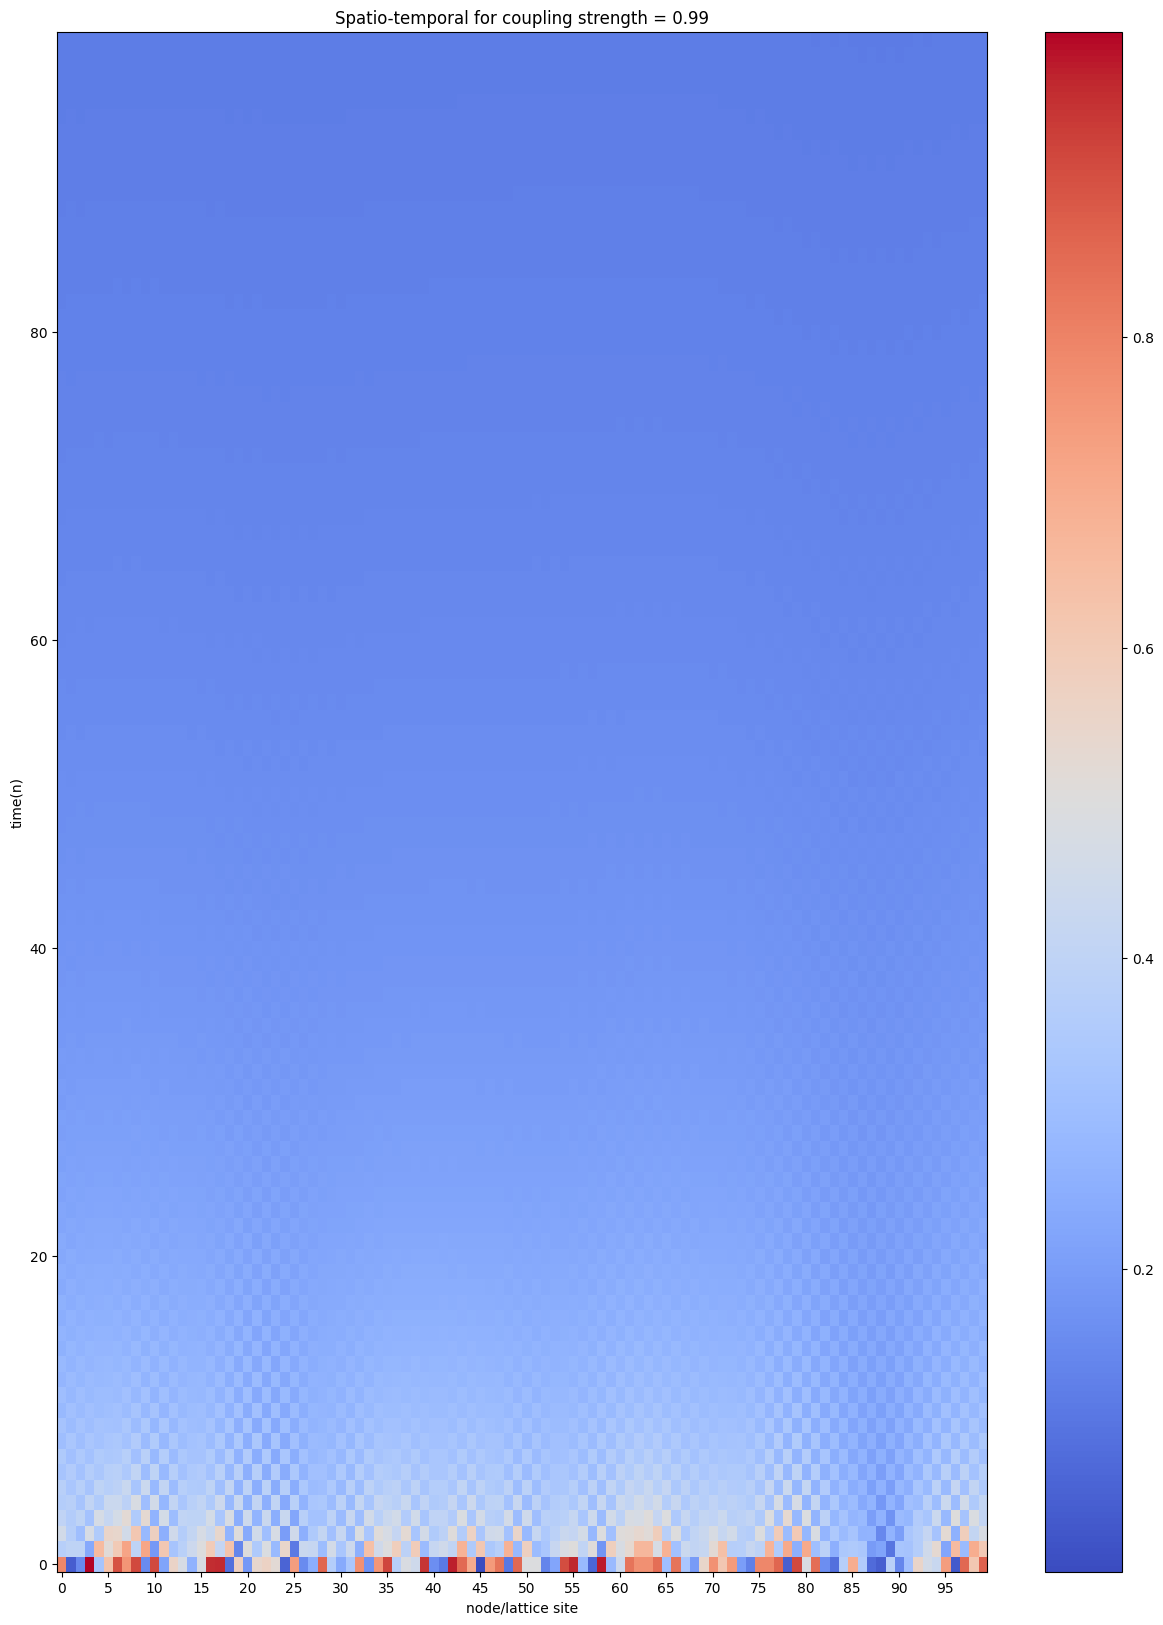

In [19]:
# def iterate(X_ini, A, f, e, a, iterations = 1000,n = 10, M = 100):
def iterate(p,A,X_ini,e,iterations=1000,n=1,M=100):
    # initialize
    N = len(X_ini)
    X = np.zeros([N, iterations])
    X [:,0] = X_ini

    for k in range(1, iterations):
        Ap_term = np.sum(np.multiply(A, p(X[:, k-1])).T, axis=0)
        X[:, k] = (1 - e) * p(X[:, k-1]) + 0.5 * e * Ap_term

    plt.figure().set_size_inches(15, 20)
    plt.imshow(X.T[-M::n,:], origin='lower', aspect='auto', cmap='coolwarm')
    plt.colorbar()
    plt.xticks(np.arange(0, X.shape[0], 5))
    plt.xlabel('node/lattice site')
    plt.ylabel('time(n)')
    plt.title('Spatio-temporal for coupling strength = ' + str(e))

    return X

e = 0.99

fin_X = iterate(phase_transition_map, adj_matrix, X_ini, e, 100)

In [ ]:
def circle_map(w, x):
    y = x + w - (1/2 * np.pi) * np.sin(2 * np.pi * x)
    return y

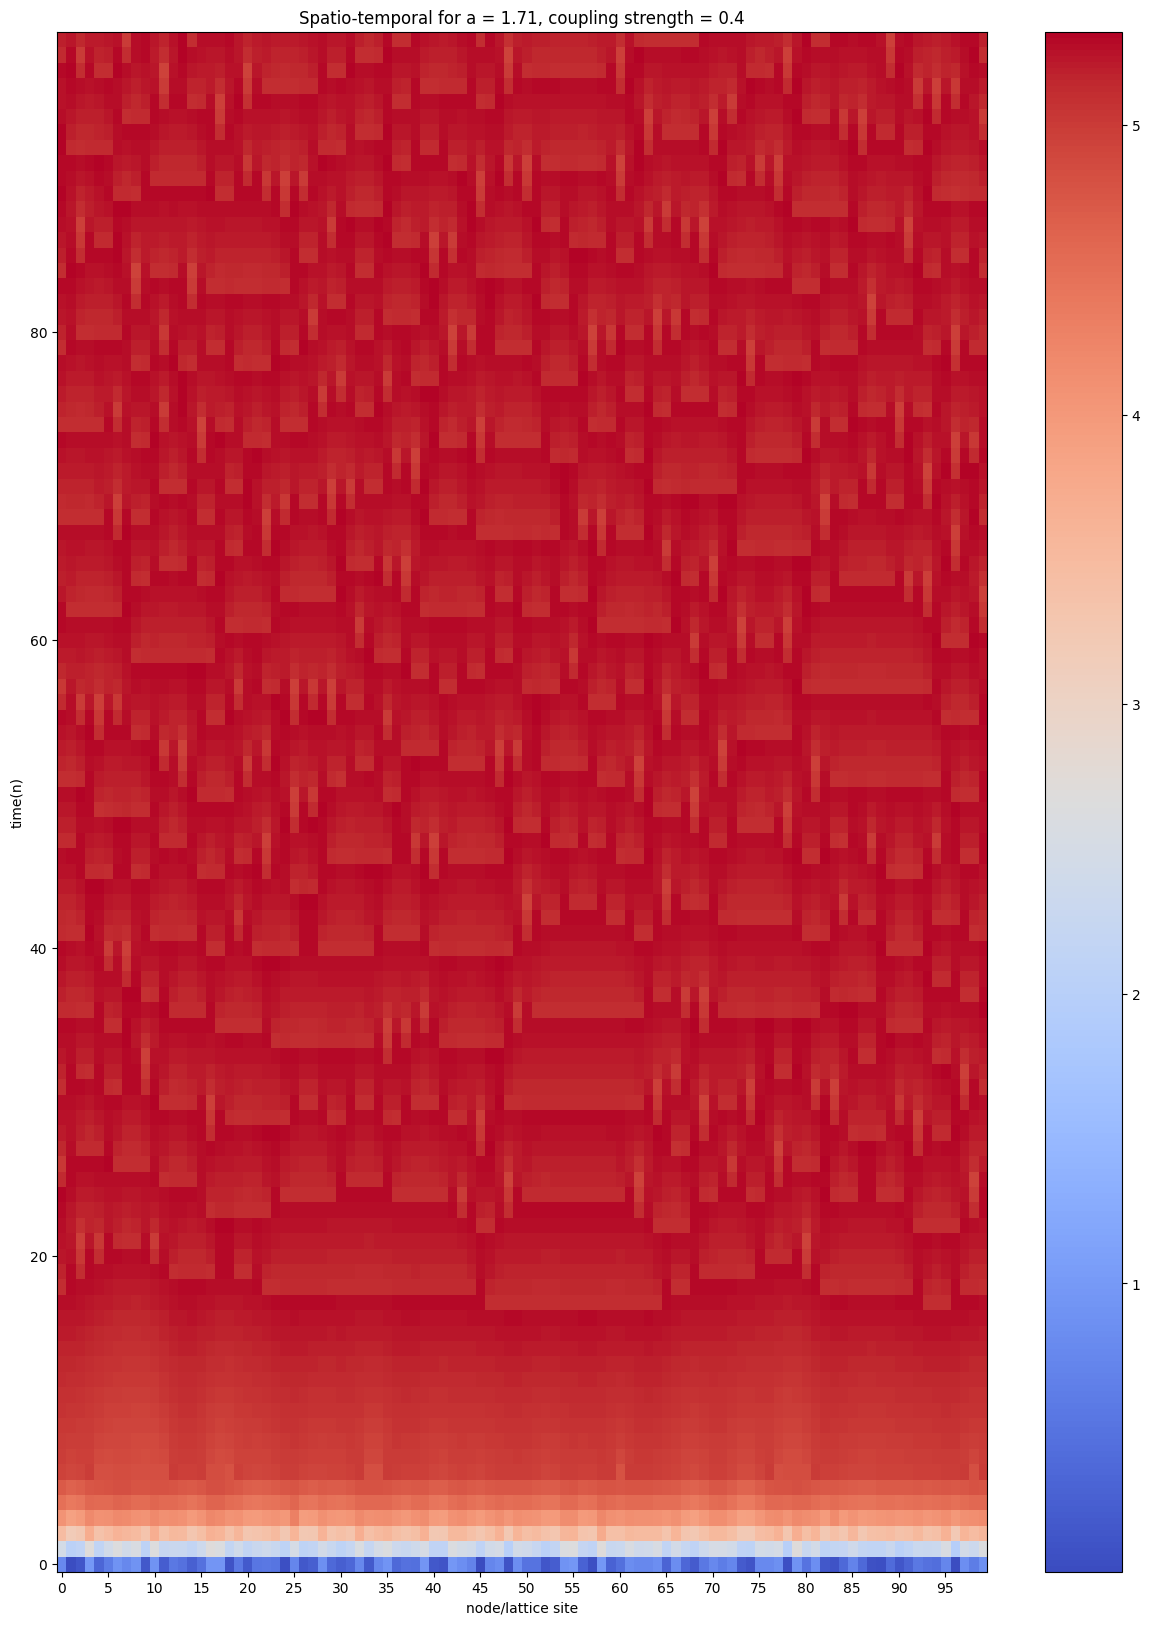

In [22]:
# def iterate(X_ini, A, f, e, a, iterations = 1000,n = 10, M = 100):
def iterate(y,A,X_ini,e,w,iterations=1000,n=1,M=100):
    # initialize
    N = len(X_ini)
    X = np.zeros([N, iterations])
    X [:,0] = X_ini

    for k in range(1, iterations):
        Ay_term = (np.sum(np.multiply(A, y(w, X[:, k-1])).T, axis=0)) % 1
        X[:, k] = (1 - e) * y(a, X[:, k-1]) + 0.5 * e * Ay_term

    plt.figure().set_size_inches(15, 20)
    plt.imshow(X.T[-M::n,:], origin='lower', aspect='auto', cmap='coolwarm')
    plt.colorbar()
    plt.xticks(np.arange(0, X.shape[0], 5))
    plt.xlabel('node/lattice site')
    plt.ylabel('time(n)')
    plt.title('Spatio-temporal for a = ' + str(w) + ', coupling strength = ' + str(e))

    return X

w = 1.71
e = 0.4

fin_X = iterate(circle_map,adj_matrix,X_ini,e,w,100)